In [2]:
import os
import sys
import pandas as pd

os.getcwd()

'/Users/chririn/Documents/Code/2D_analysis'

In [22]:
# installed requirements.txt within the pycyt environment: (pycyt) chririn@BMC-02GC28PQ6LT: conda install --file /Users/chririn/Documents/Code/pycytominer-master/requirements.txt
# needs scipy==1.7.3 --> otherwise the name of median_absolute_deviation is changed: (pycyt) chririn@BMC-02GC28PQ6LT: conda install scipy==1.7.3
from pycytominer import aggregate
from pycytominer import annotate
from pycytominer import consensus
from pycytominer import feature_select
from pycytominer import normalize


#### Todo: get this to work

%run /Users/chririn/Documents/Code/pycytominer-master/setup.py

%run /Users/chririn/Documents/Code/pycytominer-master/pycytominer/__init__.py

#### Play with the codes

In [7]:
# Import my data 
BaseDir = "./ImageMedianFeatures/"


In [12]:
df = pd.read_csv("{}ImageMediansAllPlates.csv".format(BaseDir), sep=";", index_col=0)
df['PlateWell'] = df.index.str[:-2]
df.head(2)

,ImageNumber_nuclei,ObjectNumber_nuclei,Metadata_Site_nuclei,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_8_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,PlateWell
ImageID,,,,,,,,,,,,,,,,,,,,,
colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02_1,1.0,53.5,1.0,1860.0,2597.0,1062.5,806.5,1017.5,764.5,1037.132364,...,-0.803829,0.171201,-0.542558,1.492466,-0.100184,0.658361,-0.035433,0.043947,0.426303,colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02
colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02_2,1.0,109.0,2.0,2172.0,3132.0,1131.0,1125.0,1085.0,1077.0,1101.465390,...,0.633041,-0.449679,-0.092700,-0.570651,0.135756,0.667336,0.282705,0.759973,-0.182920,colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02


In [18]:
ListOfData = list(df.columns.values)
ListOfFeatures = list(set(ListOfData) - set(['PlateWell','Metadata_Site_nuclei','Metadata_Site_cytoplasm','Metadata_Site_cells','ImageNumber_cells','ImageNumber_cytoplasm', 'ImageNumber_nuclei']))

In [46]:
population_df = aggregate(df, strata="PlateWell", features = ListOfFeatures, operation = "median", output_file="none", compute_object_count=False)
population_df.head(1)

,PlateWell,RadialDistribution_ZernikePhase_illumPHAandWGA_4_0_nuclei,RadialDistribution_FracAtD_illumPHAandWGA_1of4_cytoplasm,RadialDistribution_FracAtD_illumMITO_Overflow_cytoplasm,Granularity_10_illumHOECHST_cells,RadialDistribution_ZernikeMagnitude_illumHOECHST_4_4_cytoplasm,RadialDistribution_MeanFrac_illumPHAandWGA_3of4_cells,RadialDistribution_ZernikeMagnitude_illumPHAandWGA_9_5_cytoplasm,RadialDistribution_MeanFrac_illumCONC_3of4_cytoplasm,RadialDistribution_ZernikeMagnitude_illumMITO_9_7_nuclei,...,RadialDistribution_FracAtD_illumPHAandWGA_3of4_cytoplasm,Intensity_MADIntensity_illumMITO_cytoplasm,Granularity_16_illumCONC_cytoplasm,Intensity_IntegratedIntensityEdge_illumPHAandWGA_nuclei,RadialDistribution_ZernikePhase_illumPHAandWGA_4_4_nuclei,Location_CenterMassIntensity_Y_illumSYTO_cytoplasm,RadialDistribution_ZernikePhase_illumCONC_8_2_cytoplasm,Intensity_UpperQuartileIntensity_illumCONC_cytoplasm,RadialDistribution_MeanFrac_illumCONC_Overflow_cytoplasm,RadialDistribution_FracAtD_illumSYTO_4of4_cells
0,colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02,-1.570796,0.002788,0.151005,4.091094,0.000252,0.862648,0.002519,0.960206,0.000489,...,0.246529,0.009913,0.354529,29.981959,-0.101183,961.001832,0.078749,0.100456,0.586899,0.031672


In [47]:
dfLayout = pd.read_csv("colopaint44-v1-metadata.csv", sep=",", index_col=0)
dfLayout['PlateWell'] = dfLayout.index + '_' + dfLayout['well_id']
dfLayout.head(1)

,well_id,batch_id,solvent,stock_conc,stock_conc_unit,cmpd_vol,cmpd_vol_unit,well_vol,well_vol_unit,pert_type,cmpd_conc,cmpd_conc_unit,batchid,cbkid,libid,libtxt,smiles,inchi,inkey,PlateWell
layout_id,,,,,,,,,,,,,,,,,,,,
colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,PHB000015,dmso,10.0,mM,7.5,nL,30,uL,poscon,2.5,uM,PHB000015,[tetr],[tetr],pharmb_io,NaN,NaN,NaN,colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02


In [44]:
# what does clean_cellprofiler do? 
annotated = annotate(population_df, platemap=dfLayout, join_on=["Metadata_PlateWell", "PlateWell"],add_metadata_id_to_platemap=True, format_broad_cmap=False, clean_cellprofiler=False)

In [52]:
# Normalize: choose between standardize, robustize, mad_robustize, spherize 
# --> what are the different things? 
# Check: do my data contain image features? 
normalized = normalize(annotated, features=ListOfFeatures,image_features=False, meta_features="infer", samples="Metadata_pert_type == 'negcon'", method="standardize")

In [53]:
# Feature selection 
# what do the different methods select for? 
selected_df = feature_select(normalized, features=ListOfFeatures, operation=["variance_threshold", "correlation_threshold"])



In [63]:
ListOfSelectedFeatures = list(selected_df.columns.values)
ListOfMetadata = list(selected_df.columns[selected_df.columns.str.contains("Metadata_")])
ListOfSelectedFeatures = list(set(ListOfSelectedFeatures) - set(ListOfMetadata))

#### Now the data is ready

In [67]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [68]:
pca = PCA(n_components=4)
x = selected_df.loc[:, ListOfSelectedFeatures[:]].values
x = StandardScaler().fit_transform(x)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents)
principalDf.rename(
    columns={
        0: "principal component 1",
        1: "principal component 2",
        2: "principal component 3",
        3: "principal component 4",
    },
    inplace=True,
)

In [69]:
principalDf = principalDf.merge(
    selected_df[ListOfMetadata],
    left_index=True,
    right_index=True,
)

In [81]:
df2 = selected_df

In [73]:
import matplotlib.pyplot as plt

In [86]:
import seaborn as sns; sns.set_style("white")

In [87]:
df2["Metadata_compound"] = df2["Metadata_cbkid"].str[:6] # create a column with a short compound name

In [95]:
ConcList = sorted(list(set(df2["Metadata_cmpd_conc"])))
ConcList.remove(2.5)


In [100]:
df2['Metadata_cmpd_conc'].loc[(df2['Metadata_compound'] == '[dmso]')] = 100

/var/folders/bx/43bwk4n57dj9446w1ddn_7t40000gn/T/ipykernel_10786/2099250060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Metadata_cmpd_conc'].loc[(df2['Metadata_compound'] == '[dmso]')] = 100


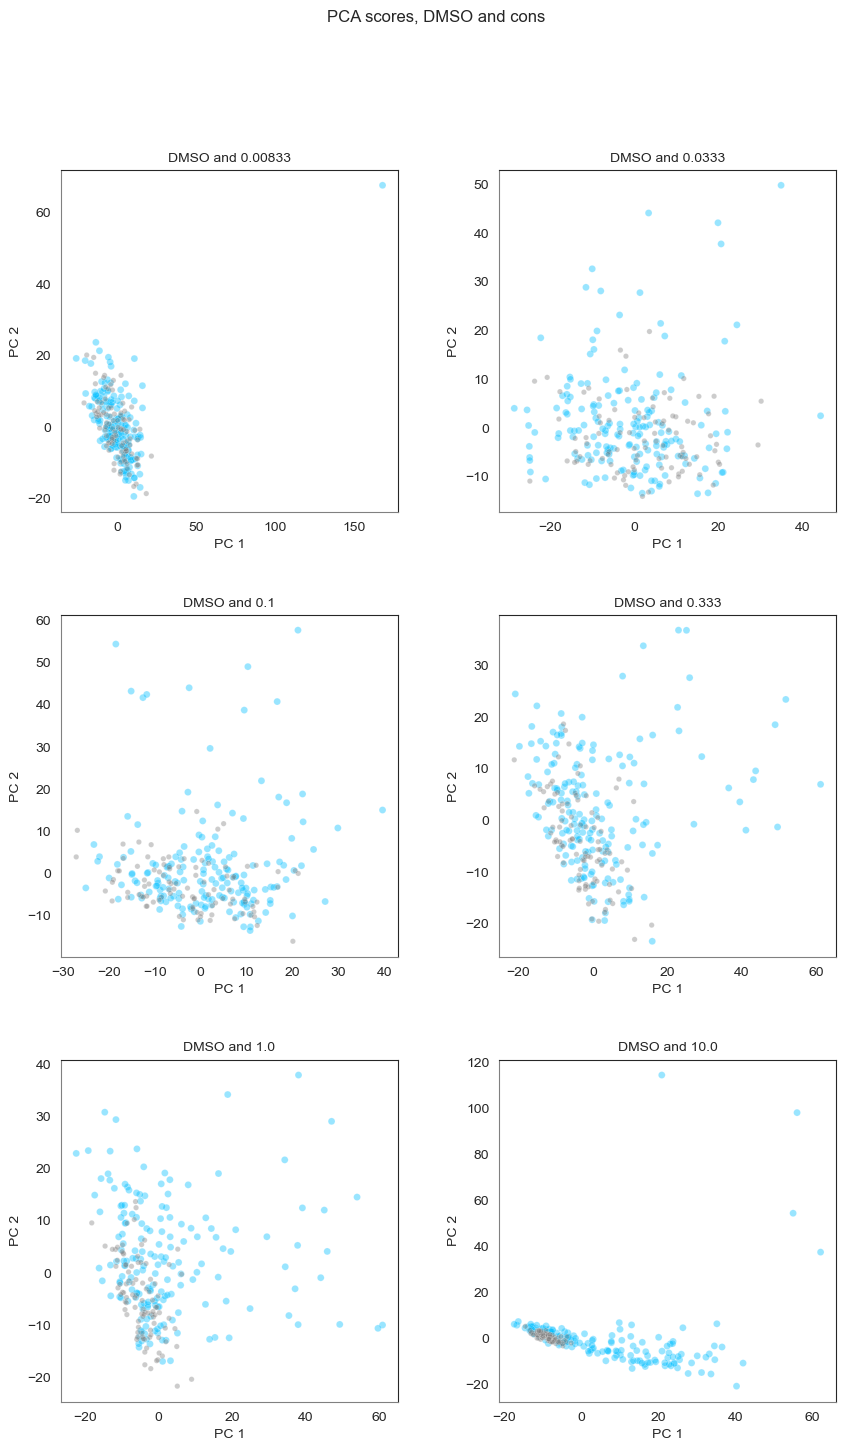

In [102]:
nrrow = 3
nrcol = 2
colors = ["deepskyblue", "gray"]

fig = plt.figure(figsize=(10, 16))
sp = 1
for conc in ConcList:
    dfOneCompound = df2.loc[
        ((df2["Metadata_cmpd_conc"] == conc)), ["Metadata_compound", "Metadata_cmpd_conc"] + ListOfSelectedFeatures
    ]
    dfDMSO = df2.loc[
        ((df2["Metadata_compound"] == "[dmso]")), ["Metadata_compound", "Metadata_cmpd_conc"] + ListOfSelectedFeatures
    ]
    frames = [dfOneCompound, dfDMSO]
    dfOneCompoundandDMSO = pd.concat(frames)
    dfOneCompoundandDMSO.reset_index(inplace=True, drop=True)

    x = dfOneCompoundandDMSO.loc[:, ListOfSelectedFeatures[:]].values
    pca = PCA(n_components=3)
    x = StandardScaler().fit_transform(x)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data=principalComponents)
    principalDf.rename(
        columns={
            0: "principal component 1",
            1: "principal component 2",
            2: "principal component 3",
        },
        inplace=True,
    )
    principalDf = principalDf.merge(
        dfOneCompoundandDMSO[["Metadata_compound", "Metadata_cmpd_conc"]], left_index=True, right_index=True
    )
    # principalDf.to_csv('{}/PCA_dmso_and_{}.csv'.format(OutputDir, comp), sep=';')

    ax = fig.add_subplot(nrrow, nrcol, sp)
    ax.set_xlabel("PC 1", fontsize=10)
    ax.set_ylabel("PC 2", fontsize=10)
    ax.spines["left"].set_color("grey")
    ax.spines["bottom"].set_color("grey")
    x
    ax = sns.scatterplot(
        x="principal component 1",
        y="principal component 2",
        hue="Metadata_cmpd_conc",
        data=principalDf,
        palette=colors,
        size="Metadata_cmpd_conc",
        sizes=(25, 15),
        alpha=(0.4),
        marker="o",
    )

    ax.set_title("DMSO and {}".format(conc), fontsize=10)
    ax.set_facecolor("w")
    ax.get_legend().remove()
    sp += 1
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle("PCA scores, DMSO and cons".format(), fontsize=12)
#fig.savefig(
#    "{}/PCA_DMSOandCons.{}".format(OutputDir, figformat), dpi=dpi, bbox_inches="tight"
#)
plt.show()